### Rating Average by Day

In [34]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews2.csv", parse_dates = ["Timestamp"])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [35]:
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [36]:
type(data)

pandas.core.frame.DataFrame

In [37]:
#data["Day"] = data["Timestamp"].dt.date
#day_avg = data.groupby(["Day"]).count()
#day_avg.head()
#Causes error to rest of cells, but works by itself
#Seems like "Day" causes a problem if you try to groupby it with mean()
#Video states that mean() should automatically remove the columns Course Name, Comment, and Timestamp, but this is not the case

In [38]:
grouped_average = data.groupby(["Course Name"]).mean()
grouped_average

#If the Course Name changes or the Comment column has anything other than NaN, then an error will occur

,Timestamp,Rating,Comment
Course Name,,,
The Python Mega Course: Build 10 Real World Applications,2021-03-31 02:37:02.443181824+00:00,4.494318,NaN


In [39]:
data2 = data.drop("Course Name", axis=1)
data2.head()
#Dropping the Course Name column

,Timestamp,Rating,Comment
0,2021-04-02 06:25:52+00:00,4.0,NaN
1,2021-04-02 05:12:34+00:00,4.0,NaN
2,2021-04-02 05:11:03+00:00,4.0,NaN
3,2021-04-02 03:33:24+00:00,5.0,NaN
4,2021-04-02 03:31:49+00:00,4.5,NaN


In [40]:
data3 = data2.drop("Comment", axis=1)
data3.head()
#Dropping Comment column

,Timestamp,Rating
0,2021-04-02 06:25:52+00:00,4.0
1,2021-04-02 05:12:34+00:00,4.0
2,2021-04-02 05:11:03+00:00,4.0
3,2021-04-02 03:33:24+00:00,5.0
4,2021-04-02 03:31:49+00:00,4.5


In [41]:
grouped_avg = data3.groupby(["Rating"]).mean()
grouped_avg

,Timestamp
Rating,
1.0,2021-03-29 13:25:50+00:00
2.0,2021-03-31 08:41:48+00:00
2.5,2021-03-31 05:50:51+00:00
3.0,2021-03-30 20:19:54+00:00
3.5,2021-03-30 10:19:52.249999872+00:00
4.0,2021-03-31 07:32:45.449999872+00:00
4.5,2021-03-31 09:20:25.428571392+00:00
5.0,2021-03-31 00:35:13.869565184+00:00


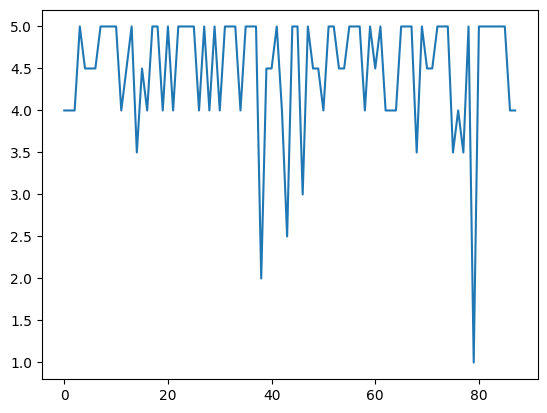

In [42]:
#grouped_avg.index
#plt.plot(grouped_avg.index) creates a single line plot
#plt.plot(grouped_avg.index, grouped_avg["Rating"]) causes an error
plt.plot(data3.index, data3["Rating"])

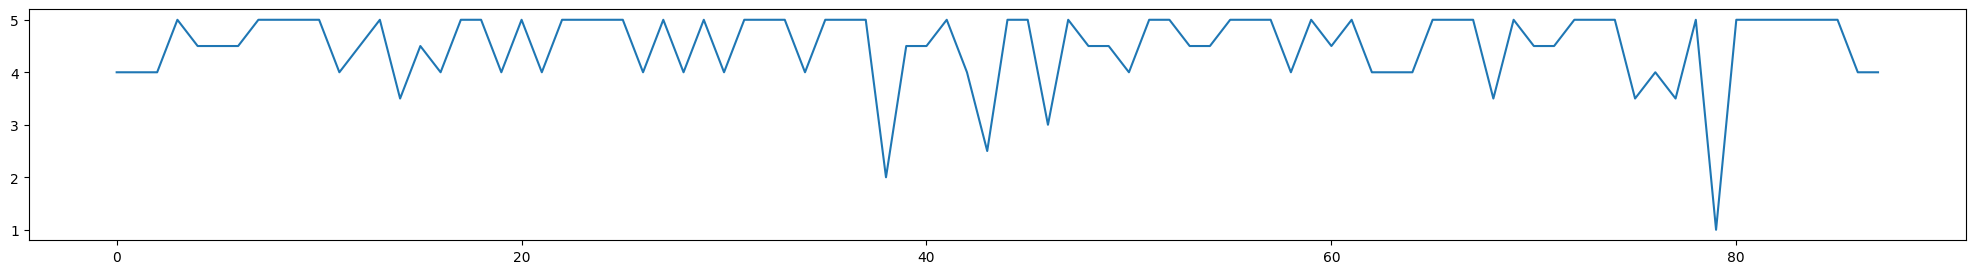

In [43]:
plt.figure(figsize=(25, 3))
plt.plot(data3.index, data3["Rating"])
#Creates a longer width graph with a shorter height

### Rating Average by Week

In [44]:
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [45]:
data["Week"] = data["Timestamp"].dt.isocalendar().week
data["Week"]

0     13
1     13
2     13
3     13
4     13
      ..
83    13
84    12
85    12
86    12
87    12
Name: Week, Length: 88, dtype: UInt32

In [46]:
data["Week"] = data["Timestamp"].dt.strftime("%m-%U")
data["Week"]
#%Y stands for year
#%U stands for week
#The dash between these is optional. The dash is used to separate the year and week number
#If you remove the dash and leave a space, then a space will separate these numbers

0     04-13
1     04-13
2     04-13
3     04-13
4     04-13
      ...  
83    03-13
84    03-13
85    03-13
86    03-13
87    03-13
Name: Week, Length: 88, dtype: object

In [47]:
data.head()

,Course Name,Timestamp,Rating,Comment,Week
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,04-13
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,04-13
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,04-13
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,04-13
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,04-13


In [48]:
week_data = data.drop("Course Name", axis=1)
week_data.head()

,Timestamp,Rating,Comment,Week
0,2021-04-02 06:25:52+00:00,4.0,NaN,04-13
1,2021-04-02 05:12:34+00:00,4.0,NaN,04-13
2,2021-04-02 05:11:03+00:00,4.0,NaN,04-13
3,2021-04-02 03:33:24+00:00,5.0,NaN,04-13
4,2021-04-02 03:31:49+00:00,4.5,NaN,04-13


In [49]:
week_data2 = week_data.drop("Timestamp", axis=1)

In [50]:
week_data3 = week_data2.drop("Comment", axis=1)
week_data3.head()

,Rating,Week
0,4.0,04-13
1,4.0,04-13
2,4.0,04-13
3,5.0,04-13
4,4.5,04-13


In [51]:
week_average = week_data3.groupby(["Week"]).mean()
week_average

,Rating
Week,
03-13,4.459677
04-13,4.576923


In [52]:
week_average.index

Index(['03-13', '04-13'], dtype='object', name='Week')

In [53]:
week_average["Rating"]

Week
03-13    4.459677
04-13    4.576923
Name: Rating, dtype: float64

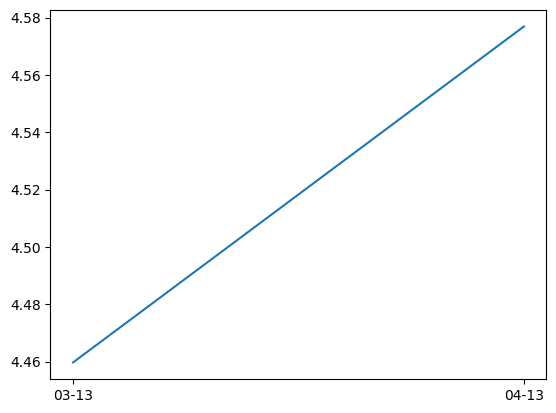

In [54]:
plt.plot(week_average.index, week_average["Rating"])

### Rating Average by Month

In [55]:
data.head()

,Course Name,Timestamp,Rating,Comment,Week
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,04-13
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,04-13
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,04-13
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,04-13
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,04-13


In [56]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")
data["Month"]

0     2021-04
1     2021-04
2     2021-04
3     2021-04
4     2021-04
       ...   
83    2021-03
84    2021-03
85    2021-03
86    2021-03
87    2021-03
Name: Month, Length: 88, dtype: object

In [57]:
data.head()

,Course Name,Timestamp,Rating,Comment,Week,Month
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,04-13,2021-04
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,04-13,2021-04
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,04-13,2021-04
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,04-13,2021-04
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,04-13,2021-04


In [58]:
month_data = data.drop("Course Name", axis=1)
month_data.head()

,Timestamp,Rating,Comment,Week,Month
0,2021-04-02 06:25:52+00:00,4.0,NaN,04-13,2021-04
1,2021-04-02 05:12:34+00:00,4.0,NaN,04-13,2021-04
2,2021-04-02 05:11:03+00:00,4.0,NaN,04-13,2021-04
3,2021-04-02 03:33:24+00:00,5.0,NaN,04-13,2021-04
4,2021-04-02 03:31:49+00:00,4.5,NaN,04-13,2021-04


In [59]:
month_data2 = month_data.drop("Timestamp", axis=1)

In [60]:
month_data3 = month_data2.drop("Comment", axis=1)

In [61]:
month_data4 = month_data3.drop("Week", axis=1)
month_data4.head()

,Rating,Month
0,4.0,2021-04
1,4.0,2021-04
2,4.0,2021-04
3,5.0,2021-04
4,4.5,2021-04


In [62]:
month_average = month_data4.groupby(["Month"]).mean()
month_average

,Rating
Month,
2021-03,4.459677
2021-04,4.576923


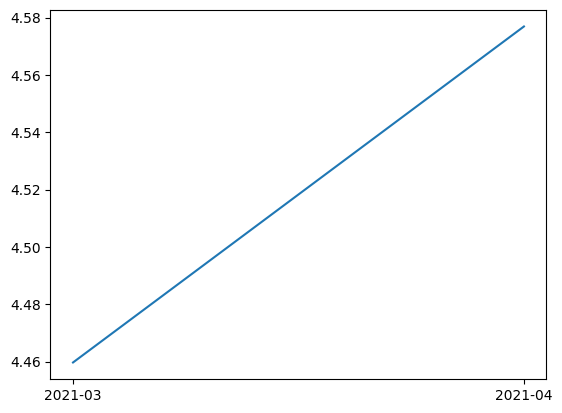

In [63]:
plt.plot(month_average.index, month_average["Rating"])